<a href="https://colab.research.google.com/github/lakshit2808/Machine-Learning-Notes/blob/master/ML_Models/Regression/Multiple_Linear_Regression/multi_linear_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Libraries

<img src='https://github.com/lakshit2808/Machine-Learning-Notes/blob/master/Resources/Images/MultiReg.jpg?raw=true' width='500'>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

## 2. Reading Data

In [ ]:
df = pd.read_csv('FuelConsumptionCo2.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
sdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
sdf.head()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


## 3. Train/Test Split

In [ ]:
mdf = np.random.rand(len(df)) < 0.8
train = sdf[mdf]
test = sdf[mdf]

## 4. Data Visualization
Checking for linear variables

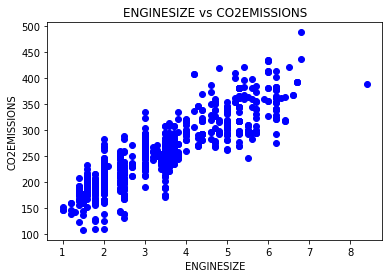

In [ ]:
# ENGINESIZE vs CO2EMISSIONS

plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('ENGINESIZE vs CO2EMISSIONS')
plt.show()

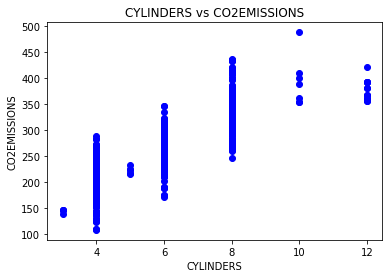

In [ ]:
# CYLINDERS vs CO2EMISSIONS

plt.scatter(train.CYLINDERS, train.CO2EMISSIONS , color='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.title('CYLINDERS vs CO2EMISSIONS')
plt.show()

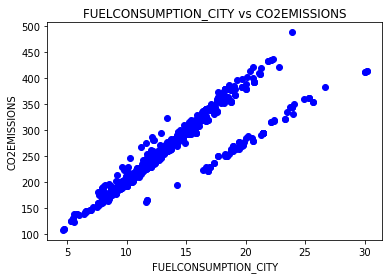

In [ ]:
# FUELCONSUMPTION_CITY vs CO2EMISSIONS

plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS , color='blue')
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.title('FUELCONSUMPTION_CITY vs CO2EMISSIONS')
plt.show()

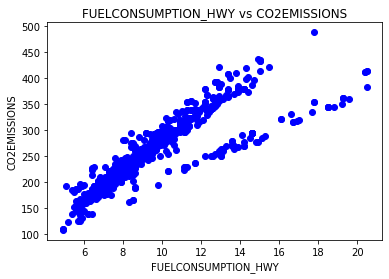

In [ ]:
# FUELCONSUMPTION_HWY vs CO2EMISSIONS

plt.scatter(train.FUELCONSUMPTION_HWY, train.CO2EMISSIONS , color='blue')
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2EMISSIONS')
plt.title('FUELCONSUMPTION_HWY vs CO2EMISSIONS')
plt.show()

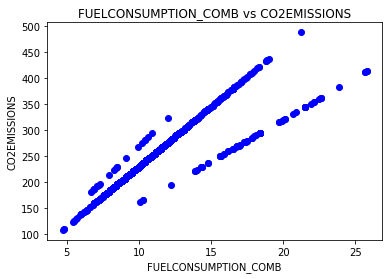

In [ ]:
# FUELCONSUMPTION_COMB vs CO2EMISSIONS

plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS , color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.title('FUELCONSUMPTION_COMB vs CO2EMISSIONS')
plt.show()

## 4. Multi Linear Regression

In [ ]:
from sklearn import linear_model
multireg = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE' , 'CYLINDERS' , 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y= np.asanyarray(train[['CO2EMISSIONS']])

multireg.fit(x,y)

print('Slope: {}'.format(multireg.coef_))

Slope: [[11.46896899  7.03854912  6.36183555  2.6571728 ]]


## 5. Prediction

In [ ]:
y_ = multireg.predict(train[['ENGINESIZE', 'CYLINDERS' , 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])

x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS' , 'FUELCONSUMPTION_CITY' ,'FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print('Mean Square Error: {}'.format(np.mean((y_ - y)**2)))

# Explained variance score: 1 is perfect prediction
print('Variance Score {}'.format(multireg.score(x,y)))

Mean Square Error: 545.4427290557038
Variance Score 0.8643462476081282


**explained variance regression score:**  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$  
The best possible score is 1.0, lower values are worse.